# Lecture 3

---

## Parameter estimation

<br>

Material: [https://gitlab.rrz.uni-hamburg.de/BAN1966/statlecture](https://gitlab.rrz.uni-hamburg.de/BAN1966/statlecture)

<br>
 Hartmut Stadie

hartmut.stadie@uni-hamburg.de

## Estimator

Estimator $\hat a$ for parameter $a$ from sample $x_1,\dots x_n$

Criteria for good estimators:

-   consistent:  
    $\lim_{n\to \infty } \hat a = a$

-   unbiased:  
    $E[\hat a]= a$

-   efficient: $V[\hat a]$ is small

Exercise: Estimate the mean $\mu$ and variance $\sigma^2$ of a p.d.f. $p(x)$ from a sample
$x_1,\dots,x_n$

### Estimate for the mean

Estimator for the mean $\mu$:
$$\hat \mu = \bar x = \frac{1}{n}\sum_{i=1}^n x_i$$

Tests:

-   consistent:
    $$\lim_{n\to \infty } \hat \mu = \lim_{n\to \infty }  \frac{1}{n}\sum_{i=1}^n x_i = \int x p(x)\,dx = \mu$$

-   unbiased:
    $$E[\hat \mu]= E[ \frac{1}{n}\sum_{i=1}^n x_i ] =  \frac{1}{n} \sum_{i=1}^n E[x_i] = \frac{1}{n} \sum_{i=1}^n \mu = \mu$$

### Estimator for the mean 

Estimator for the mean: $\mu$:
$$\hat \mu = \bar x = \frac{1}{n}\sum_{i=1}^n x_i$$

Test:

-   efficient: $V[\hat a]$ is small
    $$V[\hat \mu] = V[ \frac{1}{n}\sum_{i=1}^n x_i ] =   \frac{1}{n^2} V[ \sum_{i=1}^n x_i ]  =   \frac{1}{n^2}  \sum_{i=1}^n\sum_{j=1}^n \text{cov}(x_i, x_j)$$
    $$V[\hat \mu] =   \frac{1}{n^2}  \sum_{i=1}^n \text{cov}(x_i, x_i)=  \frac{n\sigma^2}{n^2} =  \frac{\sigma^2}{n}$$
    (or via the) central limit theorem)

### Test via Monte Carlo

check for bias and efficiency for two different estimators of the mean:
$$\hat \mu_1 = \frac{1}{n}\sum_{i=1}^n x_i\text{ and } \hat \mu_2 = \frac{x_\text{max}+ x_\text{min}}{2}$$
for samples with 10 elements drawn from a Gaussian p.d.f. with $\mu=1$ and $\sigma = 1$ or from a uniform p.d.f. with the range [0, 2]:
 - draw 1000 samples
 - compute the means
 - plot $\hat \mu - \mu_\text{true}$ and compute the mean and variance of this variable


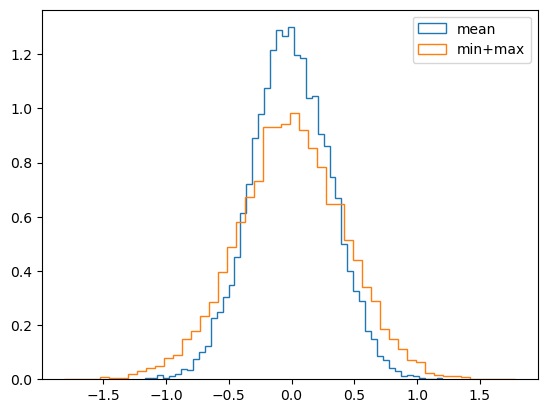

0.99511636269197 0.99546465884015 0.31326753831096515 0.42925857926355127


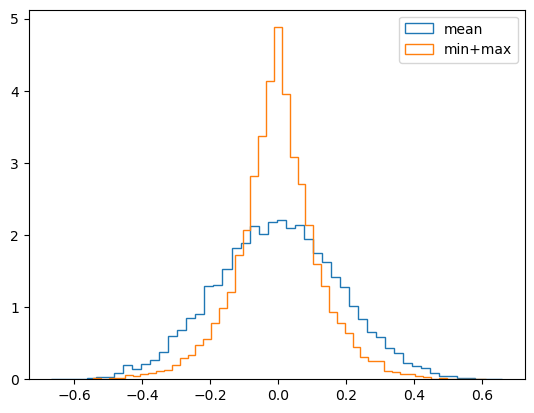

0.9991353105600731 0.9985336770389502 0.18102220486999085 0.12274409194104928


In [235]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

xs = scipy.stats.norm.rvs(1,1,size=(10000,10))
ys = scipy.stats.uniform.rvs(0,2,size=(10000,10))

mean_1 = np.mean(xs, axis=1)
mean_2 = 0.5*(np.max(xs, axis=1) + np.min(xs, axis=1))

plt.hist(mean_1 - 1, bins=50, density=True, histtype="step", label="mean")
plt.hist(mean_2 - 1, bins=50, density=True, histtype="step", label="min+max")
plt.legend()
plt.show()
print(np.mean(mean_1), np.mean(mean_2), np.std(mean_1), np.std(mean_2))


mean_1 = np.mean(ys, axis=1) 
mean_2 = 0.5*(np.max(ys, axis=1) + np.min(ys, axis=1))

plt.hist(mean_1 - 1, bins=50, density=True, histtype="step", label="mean")
plt.hist(mean_2 - 1, bins=50, density=True, histtype="step", label="min+max")
plt.legend()
plt.show()
print(np.mean(mean_1), np.mean(mean_2), np.std(mean_1), np.std(mean_2))


### Estimator for the variance

Estimator for the variance $\sigma^2$:

Let's repeat the tests from before with the sample variance 
$$\hat \sigma^2  = V[x] = \frac{1}{n}\sum_{i=1}^n (x_i  - <x>)^2$$
as an estimator.

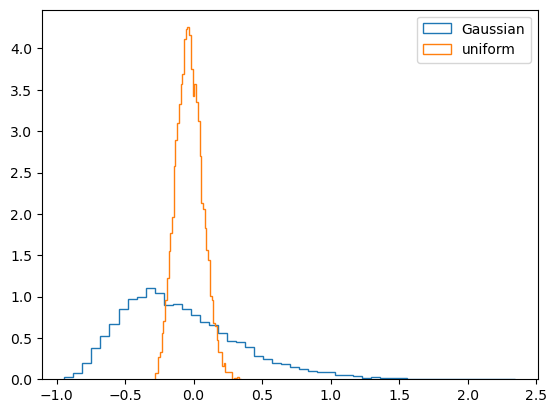

-0.09173979084057217 -0.03219645250800269 0.43094513719995864 0.09625986700443462


In [242]:
#try again with `np.var` 
n_sample = 10
xs = scipy.stats.norm.rvs(1,1,size=(10000,n_sample))
ys = scipy.stats.uniform.rvs(0,2,size=(10000,n_sample))

var_1 = np.var(xs, axis=1)
var_2 = np.var(ys, axis=1)

plt.hist(var_1 - 1, bins=50, density=True, histtype="step",  label="Gaussian")
plt.hist(var_2 - 4/12, bins=50, density=True, histtype="step", label="uniform")
plt.legend()
plt.show()
print(np.mean(var_1-1), np.mean(var_2-4/12), np.std(var_1), np.std(var_2))



### Estimator of the variance

Test:

-   consistent:
    $\lim_{n\to \infty } \hat {\sigma^2} = \lim_{n\to \infty }   \frac{n-1}{n}\sigma^2 =\sigma^2$

-   unbiased:
    $$E[\hat {\sigma^2}]= E[ \frac{1}{n}\sum_{i=1}^n (x_i^2 - \bar x^2)] =  \frac{1}{n} \sum_{i=1}^n E[x_i^2-\bar x^2] = E[x^2] - E[\bar x^2]$$
    $$E[\hat{\sigma^2}]=  E[x^2] - E[x]^2 + E[x]^2  - E[\bar x^2] =  E[x^2] - E[x]^2   - (E[\bar x^2] - E[\bar x]^2)$$
    $$E[\hat {\sigma^2}] =  V(x) - V(\bar x) = \sigma^2 - \frac{\sigma^2}{n} = \frac{n-1}{n}\sigma^2 \ne  \sigma^2$$
    
Bias corrected estimator:
$$\hat \sigma^2  = \frac{n}{n-1}V[x] = \frac{n}{n-1} \frac{1}{n}\sum_{i=1}^n (x_i  - <x>)^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i  - <x>)^2$$


### Test with Monte Carlo

Repeat the MC test with the new estimator:
$$\hat \sigma^2  = \frac{1}{n-1}\sum_{i=1}^n (x_i  - <x>)^2$$
This is `np.var(xs, ddof=1)` in *numpy*

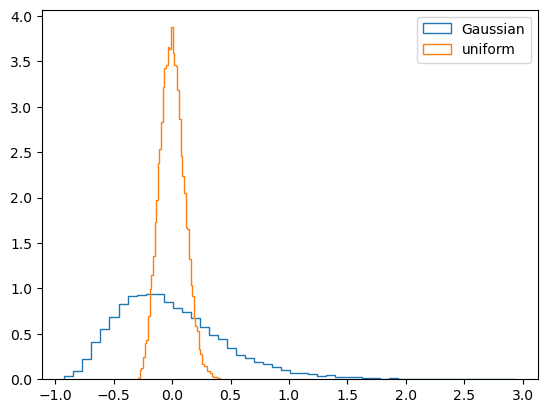

-0.008192951318145484 -0.0020165491132805398 0.46306611838448253 0.10639942106612825


In [243]:
#try again with `np.var` 
n_sample = 10
xs = scipy.stats.norm.rvs(1,1,size=(10000,n_sample))
ys = scipy.stats.uniform.rvs(0,2,size=(10000,n_sample))

var_1 = np.var(xs, axis=1, ddof=1)
var_2 = np.var(ys, axis=1, ddof=1)

plt.hist(var_1 - 1, bins=50, density=True, histtype="step", label="Gaussian")
plt.hist(var_2 - 4/12, bins=50, density=True, histtype="step", label="uniform")
plt.legend()
plt.show()
print(np.mean(var_1-1), np.mean(var_2-4/12), np.std(var_1), np.std(var_2))


# General methods for parameter estimation

- method of least squares
- method of maximum likelihood

## The method of least squares


### Line fitting with least squares

$y(x) = mx +  a$: Determine $\hat m$ und $\hat a$!

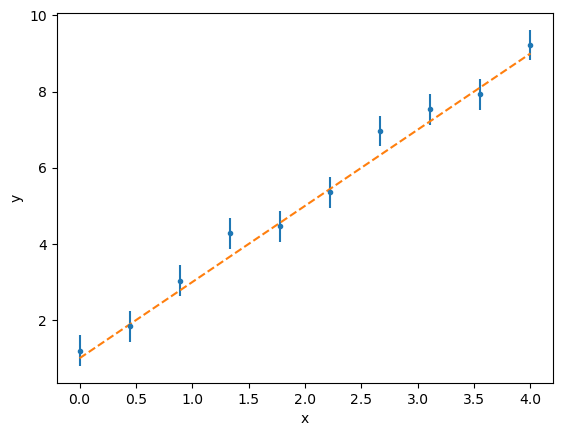

In [244]:
#hideme
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

def f(x):
    return 2*x + 1

n = 10 
xs = np.linspace(0,4,n)
sigma_y=0.4
ys = stats.multivariate_normal.rvs(f(xs), np.eye(n)*sigma_y**2, 1, random_state=42)
    
x_axis = np.linspace(0,4,100)
plt.errorbar(xs,ys,yerr=sigma_y,fmt=".")
plt.plot(x_axis, f(x_axis),'--')
plt.xlabel("x")
plt.ylabel("y")
plt.show() 

### Method of least squares

$$\chi^2 = \sum_i \left(\frac{y_i - \hat y(x)}{\sigma_i}\right)^2$$
quantifies the agreement between data and model 

$\rightarrow$ $\hat m$ und $\hat a$ should $\chi^2$ minimize.
<img src="./figures/11/line.png" style="width:80.0%"
alt="image" />

In [92]:
def chi2(x, y, sy, a, m):
    my = m * x + a
    r = (y - my)/sy
    return np.sum(r**2)

chi2(xs, ys, sigma_y, 1, 2)

np.float64(6.712257050298824)

### Scan $\chi^2$

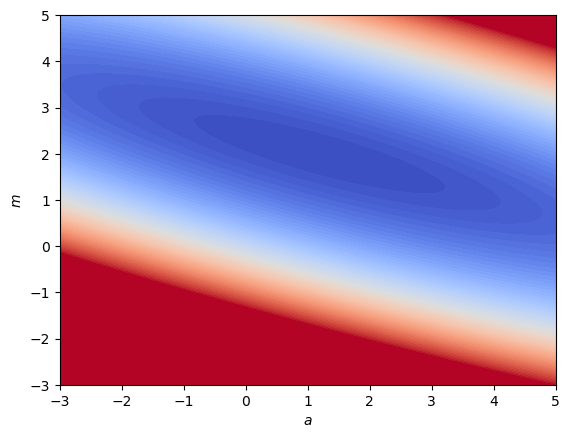

In [247]:
from matplotlib import cm
a_mesh, m_mesh = np.meshgrid(np.linspace(-3,5,100), np.linspace(-3,5,100))
chi2_vect = np.vectorize(chi2, excluded=[0, 1])
m_axis = np.linspace(-3,5,100)


plt.contourf(a_mesh, m_mesh, chi2_vect(xs, ys, sigma_y, a_mesh, m_mesh), vmin=0, vmax=5000, levels=200, cmap=cm.coolwarm)
plt.xlabel("$a$") 
plt.ylabel("$m$")
plt.show()

### Search for minima

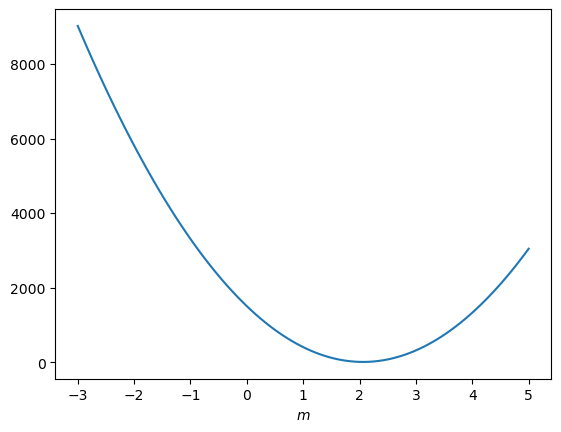

In [248]:
plt.plot(m_axis, chi2_vect(xs, ys, sigma_y, 1, m_axis))
plt.xlabel("$m$")
plt.show()

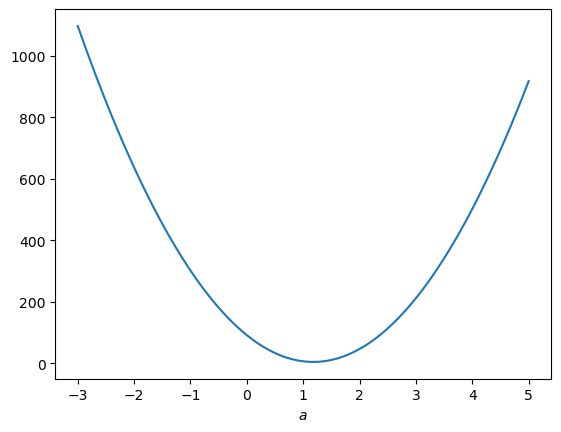

In [249]:
plt.plot(m_axis, chi2_vect(xs, ys, sigma_y, m_axis, 2))
plt.xlabel("$a$")
plt.show()

### Method of least squares II 

Minimize:
$\chi^2 = \sum_i \left(\frac{y_i - \hat y(x)}{\sigma_i}\right)^2 =  \sum_i \frac{(y_i - m x_i - a)^2}{\sigma_i^2}$:

First derivative should be 0:  

$$\begin{aligned}
  \frac{d\chi^2}{dm} &=& -2\sum_i  x_i\frac {y_i -\hat  m x_i - \hat a}{\sigma_i^2} = 0\\
  \frac{d\chi^2}{da} &=& -2\sum_i \frac{y_i - \hat m x_i - \hat a}{\sigma_i^2} = 0 \\
    \sum_i\frac{x_iy_i}{\sigma_i^2} - \hat m \sum_i\frac{x_i^2}{\sigma_i^2}- \hat a \sum_i \frac{x_i}{\sigma_i^2} &=& 0 \\
     \sum_i\frac{y_i}{\sigma_i^2} - \hat m \sum_i\frac{x_i}{\sigma_i^2}- \hat a \sum_i \frac{1}{\sigma_i^2} &=& 0 
\end{aligned}$$

### Method of least squares III 

Minimize
$\chi^2 = \sum_i \left(\frac{y_i - \hat y(x)}{\sigma_i}\right)^2 =  \sum_i \frac{(y_i - m x_i - a)^2}{\sigma_i^2}$:  
$$\begin{aligned}
    \sum_i\frac{x_iy_i}{\sigma_i^2} - \hat m \sum_i\frac{x_i^2}{\sigma_i^2}- \hat a \sum_i \frac{x_i}{\sigma_i^2} &=& 0 \\
     \sum_i\frac{y_i}{\sigma_i^2} - \hat m \sum_i\frac{x_i}{\sigma_i^2}- \hat a \sum_i \frac{1}{\sigma_i^2} &=& 0   
\end{aligned}$$ with
$\frac{1}{\sum_i 1/\sigma_i^2} \sum_i \frac{f}{\sigma_i^2} = \langle f \rangle$:  
$$\begin{aligned}
     \langle xy  \rangle -\langle x^2  \rangle \hat m& - \langle x  \rangle  \hat a&= 0\\
     \langle y  \rangle - \langle x  \rangle \hat m& - \hat a& = 0    
\end{aligned}$$

### Method of least squares IV 

$$\begin{aligned}
       \hat m&=&\frac{\langle xy  \rangle - \langle y  \rangle\langle x  \rangle}{\langle x^2  \rangle - \langle x  \rangle^2} =  \frac{1}{\sum_i 1/\sigma_i^2} \sum_i \frac{x_i - \langle x \rangle}{\sigma_i^2(\langle x^2  \rangle - \langle x  \rangle^2)}y_i\\
     \hat a &=& \frac{ \langle y  \rangle  \langle x^2  \rangle- \langle y  \rangle \langle x  \rangle^2- \langle x  \rangle \langle xy  \rangle+ \langle y  \rangle \langle x  \rangle^2}{ \langle x^2  \rangle- \langle x  \rangle^2}\\
               &=& \frac{ \langle y \rangle \langle x^2 \rangle -  \langle x \rangle \langle xy \rangle}{ \langle x^2 \rangle -  \langle x \rangle^2} =   \frac{1}{\sum_i 1/\sigma_i^2} \sum_i \frac{\langle x^2 \rangle - \langle x \rangle x_i}{\sigma_i^2(\langle x^2  \rangle - \langle x  \rangle^2)}y_i
\end{aligned}$$

### Analytic solution

In [262]:
C = np.eye(n)*sigma_y*sigma_y
W = np.linalg.inv(C)
J = np.ones((len(ys),1))
#print(C)
#print(W)
#print(J.T@W@J)
sum_xy = (np.linalg.inv(J.T@W@J)@(J.T@W@(xs*ys)))[0]
sum_y = (np.linalg.inv(J.T@W@J)@(J.T@W@(ys)))[0]
sum_x = (np.linalg.inv(J.T@W@J)@(J.T@W@(xs)))[0]
sum_x2 = (np.linalg.inv(J.T@W@J)@(J.T@W@(xs*xs)))[0 ]
print(sum_xy, sum_y, sum_x, sum_x2)
mhat = (sum_xy - sum_x*sum_y)/(sum_x2-sum_x*sum_x)
ahat = (sum_y*sum_x2 - sum_x*sum_xy)/(sum_x2-sum_x*sum_x)
print(mhat, ahat)

13.607587603481903 5.179224444679503 1.9999999999999996 5.629629629629629
1.9937896654845055 1.191645113710492


### Result plot

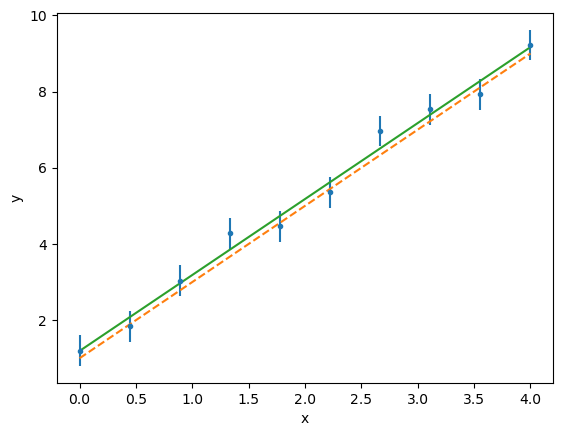

In [82]:
x_axis = np.linspace(0,4,100)
plt.errorbar(xs,ys,yerr=sigma_y,fmt=".")
plt.plot(x_axis, f(x_axis),'--')
plt.plot(x_axis, x_axis*mhat + ahat,'-')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("line.png")
plt.show()

Is it good?

### Errors
 

$$\begin{aligned}
V(\hat m) = \sum_i \left(\frac{d\hat m}{dy_i}\sigma_i\right)^2\text{; }\frac{d\hat m}{y_i} & = & \frac{1}{\sum_i 1/\sigma_i^2} \frac{x_i - \langle x \rangle}{\sigma_i^2(\langle x^2  \rangle - \langle x  \rangle^2)} \\
V(\hat a) = \sum_i \left(\frac{d\hat a}{dy_i}\sigma_i\right)^2\text{; }\frac{d\hat a}{y_i} & = &  \frac{1}{\sum_i 1/\sigma_i^2} \frac{\langle x^2 \rangle - \langle x \rangle x_i}{\sigma_i^2(\langle x^2  \rangle - \langle x  \rangle^2)}
\end{aligned}$$ $$\begin{aligned}
V(\hat m) &=&  \left(\frac{1}{\sum_i 1/\sigma_i^2}\right)^2 \sum_i \left(\frac{x_i - \langle x \rangle}{\sigma_i^2(\langle x^2  \rangle - \langle x  \rangle^2)}\right)^2 \sigma_i^2 \\
&=& \frac{1}{\sum_i 1/\sigma_i^2} \frac{\langle x^2 \rangle - 2\langle x \rangle \langle x \rangle + \langle x \rangle^2}{(\langle x^2  \rangle - \langle x  \rangle^2)^2} 
= \frac{1}{\sum_i 1/\sigma_i^2} \frac{1}{\langle x^2  \rangle - \langle x  \rangle^2} \\
V(\hat a) &=& \frac{1}{\sum_i 1/\sigma_i^2} \frac{\langle x^2  \rangle^2 - 2\langle x^2  \rangle\langle x  \rangle^2 + \langle x^2  \rangle\langle x  \rangle^2}{(\langle x^2  \rangle - \langle x  \rangle^2)^2}
= \frac{1}{\sum_i 1/\sigma_i^2} \frac{\langle x^2  \rangle}{\langle x^2  \rangle - \langle x  \rangle^2}
\end{aligned}$$

### Correlation

$$\begin{aligned}
V(\hat m) &=& \frac{1}{\sum_i 1/\sigma_i^2} \frac{1}{\langle x^2  \rangle - \langle x  \rangle^2} \\
V(\hat a) &=& \frac{1}{\sum_i 1/\sigma_i^2} \frac{\langle x^2  \rangle}{\langle x^2  \rangle - \langle x  \rangle^2}\\
\text{cov}(\hat m, \hat a) &=&=  \frac{1}{\sum_i 1/\sigma_i^2} \frac{\langle (x-\langle x \rangle)(\langle x^2 \rangle - \langle x \rangle x)\rangle}{(\langle x^2  \rangle - \langle x  \rangle^2)^2}\\
&=& \frac{1}{\sum_i 1/\sigma_i^2} \frac{\langle x^2 \rangle \langle x \rangle - \langle x \rangle \langle x^2 \rangle - \langle x \rangle \langle x^2 \rangle + \langle x \rangle^2\langle x \rangle}{(\langle x^2  \rangle - \langle x  \rangle^2)^2}\\
&=& - \frac{1}{\sum_i 1/\sigma_i^2} \frac{\langle x \rangle}{\langle x^2  \rangle - \langle x  \rangle^2}
\end{aligned}$$

### Errors from analytical expression

In [250]:
sum_siginv = sigma_y*sigma_y/len(ys)
V_ma = np.array([[sum_siginv/(sum_x2-sum_x*sum_x), -sum_siginv*sum_x/(sum_x2-sum_x*sum_x)],
                 [-sum_siginv*sum_x/(sum_x2-sum_x*sum_x), sum_siginv*sum_x2/(sum_x2-sum_x*sum_x)]])
print(V_ma)
print(np.sqrt(V_ma[0,0]), np.sqrt(V_ma[1,1]), V_ma[1,0]/(np.sqrt(V_ma[0,0])*np.sqrt(V_ma[1,1])))

[[ 0.00981818 -0.01963636]
 [-0.01963636  0.05527273]]
0.09908673886137244 0.2351015254581034 -0.8429272304235245


### Covariance directly from C
$$\frac{d\hat m}{y_i} =  \frac{1}{\sum_i 1/\sigma_i^2} \frac{x_i - \langle x \rangle}{\sigma_i^2(\langle x^2  \rangle - \langle x  \rangle^2)}$$

$$\frac{d\hat a}{y_i} =   \frac{1}{\sum_i 1/\sigma_i^2} \frac{\langle x^2 \rangle - \langle x \rangle x_i}{\sigma_i^2(\langle x^2  \rangle - \langle x  \rangle^2)}$$


In [263]:
dmdy = sum_siginv / (sum_x2-sum_x*sum_x)*(xs-sum_x)/sigma_y**2
dady = sum_siginv / (sum_x2-sum_x*sum_x)*(sum_x2-xs*sum_x)/sigma_y**2
A=np.array([dmdy,dady])
print(A)
print(C)

[[-0.12272727 -0.09545455 -0.06818182 -0.04090909 -0.01363636  0.01363636
   0.04090909  0.06818182  0.09545455  0.12272727]
 [ 0.34545455  0.29090909  0.23636364  0.18181818  0.12727273  0.07272727
   0.01818182 -0.03636364 -0.09090909 -0.14545455]]
[[0.16 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.16 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.16 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.16 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.16 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.16 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.16 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.16 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.16 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.16]]


In [264]:
C_ma = A@C@A.T
print(C_ma)

[[ 0.00981818 -0.01963636]
 [-0.01963636  0.05527273]]


### Error band for fitted line

$y = \hat m x +\hat a$ 

$\frac{dy}{dm} = x$ und $\frac{dy}{da} = 1$

In [267]:
def err(x, V):
    A = np.array([x, 1])
    return np.sqrt(A.T@V@A)

print(np.sqrt(V_ma[0,0]), np.sqrt(V_ma[1,1]))
err(0, V_ma)
err(2, V_ma)

0.09908673886137244 0.2351015254581034


np.float64(0.12649110640673517)

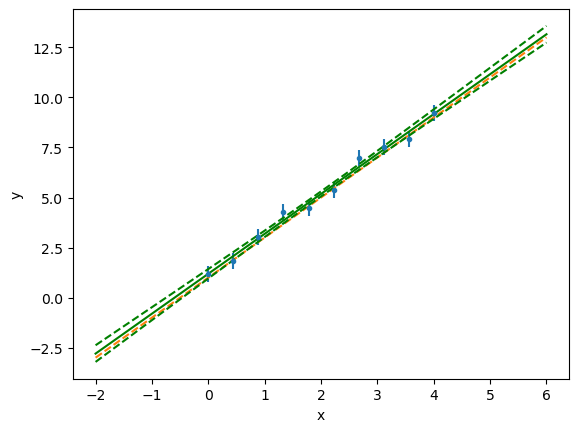

In [255]:
x_axis = np.linspace(-2,6,100)
plt.errorbar(xs,ys,yerr=sigma_y,fmt=".")
plt.plot(x_axis, f(x_axis),'--')
plt.plot(x_axis, x_axis*mhat + ahat,'-g')
plt.plot(x_axis, x_axis*mhat + ahat - np.vectorize(err,excluded=[1])(x_axis, V_ma),'--g')
plt.plot(x_axis, x_axis*mhat + ahat + np.vectorize(err,excluded=[1])(x_axis, V_ma),'--g')

plt.xlabel("x")
plt.ylabel("y")
plt.savefig("line.png")
plt.show()

### Minimal $\chi^2$ 

$$\begin{aligned}
  \chi^2 &=& \sum_i \frac{(y_i - \hat m x_i - \hat a)^2}{\sigma_i^2} = \sum_i \frac{\left[y_i -  \frac{\langle xy  \rangle - \langle y  \rangle\langle x  \rangle}{\langle x^2  \rangle - \langle x  \rangle^2} x_i - \frac{ \langle y \rangle \langle x^2 \rangle -  \langle x \rangle \langle xy \rangle}{ \langle x^2 \rangle -  \langle x \rangle^2} \right]^2}{\sigma_i^2}\\
 & = &  \sum_i \frac{\left[(\langle x^2  \rangle - \langle x  \rangle^2)y_i - (\langle xy  \rangle - \langle y  \rangle\langle x  \rangle)x_i  -  \langle y \rangle \langle x^2 \rangle +  \langle x \rangle \langle xy \rangle\right]^2}{\sigma_i^2 ( \langle x^2 \rangle -  \langle x \rangle^2)^2} \\
 &=&  \dots\\
& =& (\sum_i \frac{1}{\sigma_i^2}) V(y) ( 1- \rho^2_{xy})
\end{aligned}$$

### Minimal $chi^2$

$\chi^2 = (\sum_i \frac{1}{\sigma_i^2}) V(y) ( 1- \rho^2_{xy})$

In [101]:
print(len(ys)/(sigma_y*sigma_y)*np.var(ys)*(1-np.corrcoef(xs,ys)[0,1]**2))

4.700741203958122


$\chi^2 =\sum \frac{(y_i -\hat m x - \hat a)^2}{\sigma_i^2}$

In [96]:
np.sum(((ys - (xs * mhat + ahat))/sigma_y)**2)

np.float64(4.700741203958064)

### $m$ and $a$ values on error ellipse

$v = (m, a)$; $(v-\hat v)V_{am}^{-1}(v - \hat v)^T=1$

In [268]:
import scipy.optimize as opti

sum_xy = (np.linalg.inv(J.T@W@J)@(J.T@W@(xs*ys)))[0]
sum_y = (np.linalg.inv(J.T@W@J)@(J.T@W@(ys)))[0]
sum_x = (np.linalg.inv(J.T@W@J)@(J.T@W@(xs)))[0]
sum_x2 = (np.linalg.inv(J.T@W@J)@(J.T@W@(xs*xs)))[0]
print(sum_xy, sum_y, sum_x, sum_x2)
mhat = (sum_xy - sum_x*sum_y)/(sum_x2-sum_x*sum_x)
ahat = (sum_y*sum_x2 - sum_x*sum_xy)/(sum_x2-sum_x*sum_x)
print(mhat, ahat)


13.607587603481903 5.179224444679503 1.9999999999999996 5.629629629629629
1.9937896654845055 1.191645113710492


In [270]:
sum_siginv = sigma_y*sigma_y/len(ys)
V_am = np.array([[sum_siginv/(sum_x2-sum_x*sum_x), -sum_siginv*sum_x/(sum_x2-sum_x*sum_x)],
                 [-sum_siginv*sum_x/(sum_x2-sum_x*sum_x), sum_siginv*sum_x2/(sum_x2-sum_x*sum_x)]])

def a_from_m(m, ahat, mhat, V):
    Vinv = np.linalg.inv(V)
    a = opti.newton(lambda a: (np.array([m - mhat, a - ahat])@Vinv@np.array([[m - mhat], [a - ahat]]))[0]-1,ahat+2)
    return a

def a_from_m2(m, ahat, mhat, V):
    Vinv = np.linalg.inv(V)
    a = opti.newton(lambda a: (np.array([m - mhat, a - ahat])@Vinv@np.array([[m - mhat], [a - ahat]]))[0]-1,ahat-2)
    return a

### The ellipse

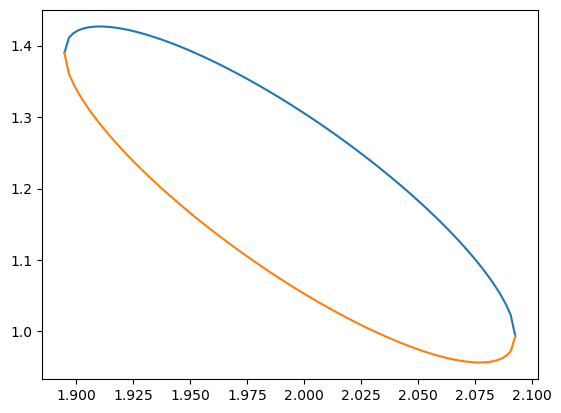

In [271]:
a_from_m(mhat, ahat, mhat, V_am)
m_axis = np.linspace(mhat-np.sqrt(V_am[0,0]),mhat+np.sqrt(V_am[0,0]),100)
plt.plot(m_axis, np.vectorize(a_from_m, excluded=[3])(m_axis, ahat, mhat, V_am))
plt.plot(m_axis, np.vectorize(a_from_m2, excluded=[3])(m_axis, ahat, mhat, V_am))


### 2-D multivariate normal distribution

$$\vec\mu = (\bar x, \bar y) \text{ und } C = \left( 
  \begin{array}{rr} 
  \sigma_x  ^2 & \rho \sigma_x \sigma_y \\ 
   \rho \sigma_x \sigma_y &  \sigma_y^2\\ 
  \end{array} \right)$$

<img src="./figures/10/error_elipse.png" width="70%" alt="image" />

### $\chi^2$ values on contour

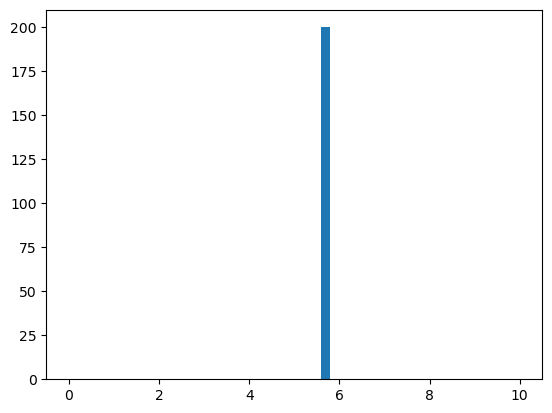

In [280]:
chi2s_on_cont = np.zeros(2*len(m_axis))
for i in range(len(m_axis)):
    m = m_axis[i]
    a = a_from_m(m, ahat, mhat, V_am)
    chi2s_on_cont[2*i] = np.sum(((ys - (xs * m + a))/sigma_y)**2)
    a = a_from_m2(m, ahat, mhat, V_am)
    chi2s_on_cont[2*i+1] = np.sum(((ys - (xs * m + a))/sigma_y)**2)
    #print(a, m , chi2s_on_cont[2*i], chi2s_on_cont[2*i+1])

    
plt.hist(chi2s_on_cont,range=(0,10), bins=50)
plt.show()

### $\Delta \chi^2$ values on contour

1.00000000000085


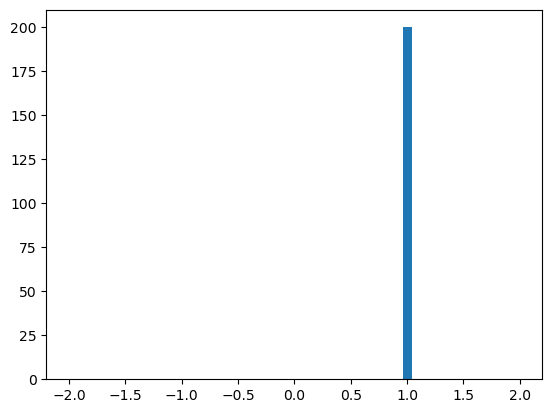

In [281]:
delta_chi2 = chi2s_on_cont - np.sum(((ys - (xs * mhat + ahat))/sigma_y)**2)
plt.hist(delta_chi2,range=(-2,2), bins=50)
print(np.mean(delta_chi2))

with $v = (m, a)$
$$(v-\hat v)V_{am}^{-1}(v - \hat v)^T=1 = \Delta \chi^2$$

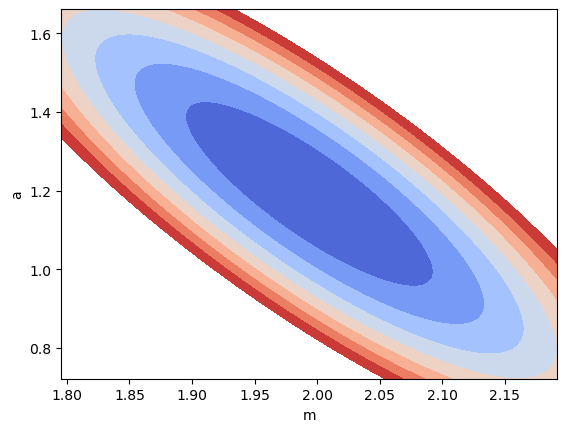

In [282]:
a_mesh, m_mesh = np.meshgrid(np.linspace(ahat-2*np.sqrt(V_am[1,1]),ahat+2*np.sqrt(V_am[1,1]),100), 
                             np.linspace(mhat-2*np.sqrt(V_am[0,0]),mhat+2*np.sqrt(V_am[0,0]),100))
plt.contourf(m_mesh, a_mesh, chi2_vect(xs, ys, sigma_y, a_mesh, m_mesh)-np.sum(((ys - (xs * mhat + ahat))/sigma_y)**2),[0,1,2,3,4,5,6,7,8], cmap=cm.coolwarm)
plt.xlabel("m")
plt.ylabel("a")
plt.show()

### In python I

Use [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html):



In [283]:
import scipy.optimize as opti

def fitf(x, m , a):
    return m*x + a

pfit, Vfit = opti.curve_fit(fitf , xs, ys, 
     sigma=[sigma_y]*len(ys), absolute_sigma=True)

print(pfit, Vfit)

[1.99378966 1.19164511] [[ 0.00981818 -0.01963636]
 [-0.01963636  0.05527273]]


Achtung! Wrong uncertainties without `absolute_sigma=True`

### Can we avoid the large correlation between $\hat m$ and $\hat a$

In [284]:
def fit2(ys):
    p, V =  opti.curve_fit(lambda x, m, a: m * (x - np.mean(xs)) + a, xs, ys, sigma=[sigma_y]*len(ys), absolute_sigma=True)
    return p, V

In [286]:
fit2(ys) 

(array([1.99378966, 5.17922444]),
 array([[ 9.81818187e-03, -5.48506188e-11],
        [-5.48506188e-11,  1.60000000e-02]]))

### Is this true?

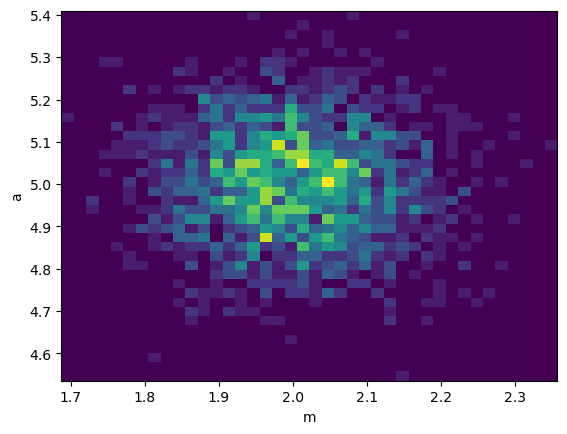

[[ 0.0097912  -0.00067184]
 [-0.00067184  0.01569472]]


In [287]:
n = 10 
xs = np.linspace(0,4,n)
sigma_y=0.4
ys = stats.multivariate_normal.rvs(f(xs), np.eye(n)*sigma_y**2, 2000, random_state=42)

p = np.zeros((len(ys),2))
chi2s = np.zeros(len(ys))
for i in range(len(ys)):
    p[i] = fit2(ys[i])[0]
    chi2s[i] = np.sum(((ys[i] - p[i,0] * xs - p[i,1])/sigma_y)**2)
    
plt.hist2d(p[:,0], p[:,1],bins=(40,40))
plt.xlabel("m") 
plt.ylabel("a")
plt.show()
print(np.cov(p, rowvar=False))

### Mit Python II

Mit [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):


In [288]:
def chi2(x, y, sy, a, m):
    my = m * x + a
    r = (y - my)/sy
    return np.sum(r**2)
    
res = opti.minimize( lambda p: chi2(xs, ys[0], sigma_y, p[1], p[0]),x0=np.zeros(2))
print(res.x, res.hess_inv * 2)

[1.99378965 1.19164514] [[ 0.00981818 -0.01963636]
 [-0.01963636  0.05527273]]


### Inverse Hessian matrix and $\chi^2$ 

$\Delta \chi2$ and Covariance:

$\Delta \chi2$ follows near the minimum a quadratic function.

covariance matrix exactly at $\Delta \chi^2 = 1$.

$$1 = \Delta \chi^2 = (\vec a - \vec{\hat a})^T V^{-1}(\vec a - \vec{\hat a})$$

With
$\chi^2(\vec a) = \chi^2(\vec{\hat a}) + (\vec a -\vec{\hat  a})^T V^{-1} (\vec a-\vec{\hat a})$
and
$H_{ij} = \frac{\partial^2 \chi^2(\vec a)}{\partial a_i \partial a_j}$  

$$H_{ij} = \frac{\partial^2 (a_k -\hat a_k) V^{-1}_{kl} (a_l -\hat a_l)}{\partial a_i \partial a_j} =  \frac{\partial( \delta_{ik}V^{-1}_{kl} (a_l -\hat a_l) + (a_k -\hat a_k) V^{-1}_{kl} \delta_{il})}{\partial a_j}$$
$$H_{ij} = \delta_{ik}V^{-1}_{kl}\delta_{lj} +  \delta_{jk}V^{-1}_{kl}\delta_{il} = 2V^{-1}_{ij}  \text{ und  } V_{ij} = 2 * H^{-1}_{ij}$$

Watch out! Some algorithms in  `minimize` do not compute the (full)  inverse Hessian matrix.

### Goodness of fit

$\chi^2$ test:
H: model and estimated parameters fit the data


If the model works, the $\chi^2$ values should follow the $\chi^2$ distribution.
<br>

Exercise: Test with pseudo-experiments

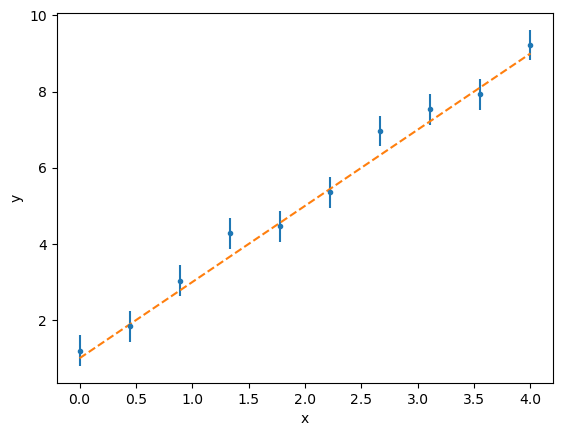

In [153]:
#hideme
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

def f(x):
    return 2*x + 1

n = 10 
xs = np.linspace(0,4,n)
sigma_y=0.4
ys = stats.multivariate_normal.rvs(f(xs), np.eye(n)*sigma_y**2, 10000, random_state=42)
    
x_axis = np.linspace(0,4,100)
plt.errorbar(xs,ys[0],yerr=sigma_y,fmt=".")
plt.plot(x_axis, f(x_axis),'--')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("line.png")
plt.show()

### Add the fit and compute $\chi^2$

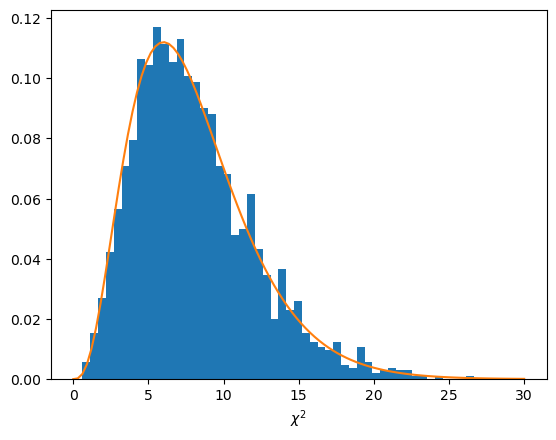

8.06715894456369


In [290]:
def fit(ys):
    p, V =  opti.curve_fit(lambda x, m, a: m * x + a, xs, ys, sigma=[sigma_y]*len(ys), absolute_sigma=True)
    return p, V

p = np.zeros((len(ys),2))
chi2s = np.zeros(len(ys))
for i in range(len(ys)):
    p[i] = fit(ys[i])[0]
    chi2s[i] = np.sum(((ys[i] - p[i,0] * xs - p[i,1])/sigma_y)**2)

chi_axis = np.linspace(0,30,100)    
plt.hist(chi2s,bins=50, density=True)
# draw Chi2 distribution
plt.plot(chi_axis, stats.chi2.pdf(chi_axis,8))
plt.xlabel("$\chi^2$")
plt.show()
print(np.mean(chi2s))

### Compute p-value for goodness of fit

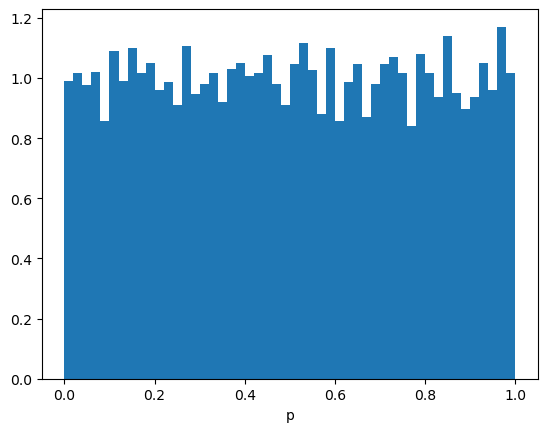

In [146]:

plt.hist(stats.chi2.sf(chi2s,8), bins=50, density=True)
plt.xlabel("p")
plt.show()


### What if the model does not fit

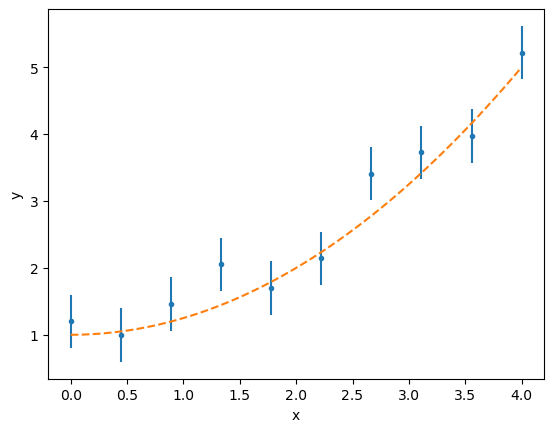

In [172]:
#hideme
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

def f(x):
    return 0.25*x**2 + 1

n = 10 
xs = np.linspace(0,4,n)
sigma_y=0.4
y2s = stats.multivariate_normal.rvs(f(xs), np.eye(n)*sigma_y**2, 10000, random_state=42)
    
x_axis = np.linspace(0,4,100)
plt.errorbar(xs,y2s[0],yerr=sigma_y,fmt=".")
plt.plot(x_axis, f(x_axis),'--')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("line.png")
plt.show()

### Perform line fit

In [291]:
p, V = fit(ys[0])
print("correct model:", p, V)
p, V = fit(y2s[0])
print("wrong model:", p, V)


correct model: [1.99378966 1.19164511] [[ 0.00981818 -0.01963636]
 [-0.01963636  0.05527273]]
wrong model: [0.99378966 0.59905253] [[ 0.00981818 -0.01963636]
 [-0.01963636  0.05527273]]


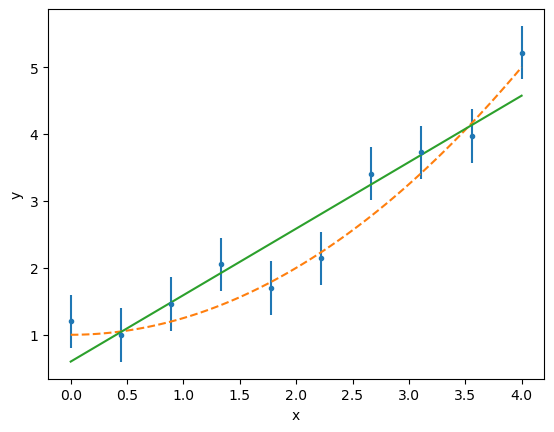

In [174]:
plt.errorbar(xs,y2s[0],yerr=sigma_y,fmt=".")
plt.plot(x_axis, f(x_axis),'--')
plt.plot(x_axis, p[0] * x_axis + p[1],'-')
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("line.png")
plt.show()

### Add the fit and compute $\chi^2$

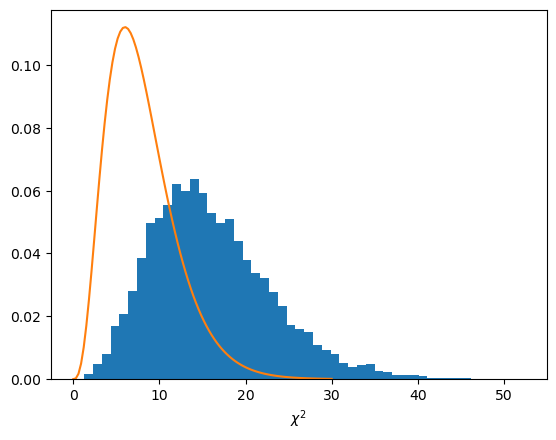

15.987344394376926


In [294]:
p = np.zeros((len(y2s),2))
chi2s = np.zeros(len(y2s))
for i in range(len(y2s)):
    p[i] = fit(y2s[i])[0]
    chi2s[i] = np.sum(((y2s[i] - p[i,0] * xs - p[i,1])/sigma_y)**2)

chi_axis = np.linspace(0,30,100)    
plt.hist(chi2s,bins=50, density=True)
plt.plot(chi_axis, stats.chi2.pdf(chi_axis,8))
plt.xlabel("$\chi^2$")
plt.show()
print(np.mean(chi2s))

### Compute p-value for goodness of fit

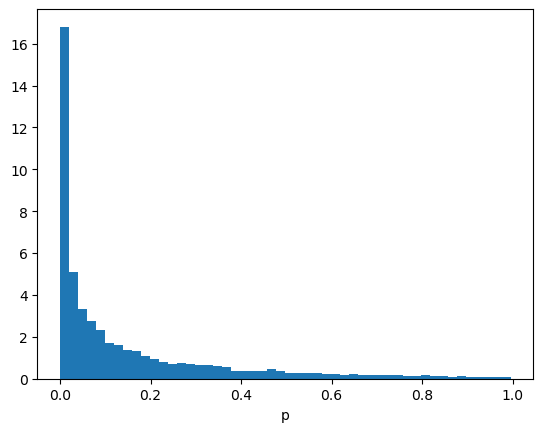

In [176]:
plt.hist(stats.chi2.sf(chi2s,8), bins=50, density=True)
plt.xlabel("p")
plt.show()

## Maximum-Likelihood 

Maximum-Likelihood (ML) data: $x_1,...,x_N$  

Probability to observe data for model with parameters $s$:
$$P(x_1,...,x_N; a) = \prod_i P(x_i ; a)$$

Likelihood function: $$L(a) =  \prod_i P(x_i ; a)$$

ML estimator $\hat a$: position of maximum of $L(a)$:
$$\left.\frac{dL}{da}\right|_{a = \hat a} = 0$$ (more practical:
log-likelihood: $-\ln L = \sum_i -\ln P(x_i; a)$)

### Example


$y(x) = mx +  a$: Determine $\hat m$ and $\hat a$
daten: $y_1,...,y_N$ and model: 

$$P(y_i; m, a) = G(y_i; \mu = m x_i +  a, \sigma=\sigma_i)$$
$$L(m, a) = \prod_i G(y_i; \mu = m x_i +  a, \sigma=\sigma_i)$$

<img src="./figures/11/line.png" alt="image" />


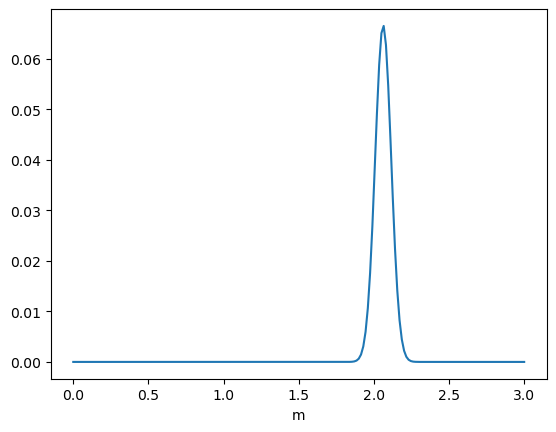

In [296]:
import scipy.stats as stats


def like(m, a, xs, ys, sigma_y):
    return np.prod(stats.norm.pdf(ys,xs*m+a,sigma_y))

like_vect = np.vectorize(like, excluded=[2,3])
m_axis = np.linspace(-0,3,200)

plt.plot(m_axis, like_vect(m_axis,1,xs, ys[0], sigma_y))
plt.xlabel("m")
#plt.yscale('log')
plt.show()

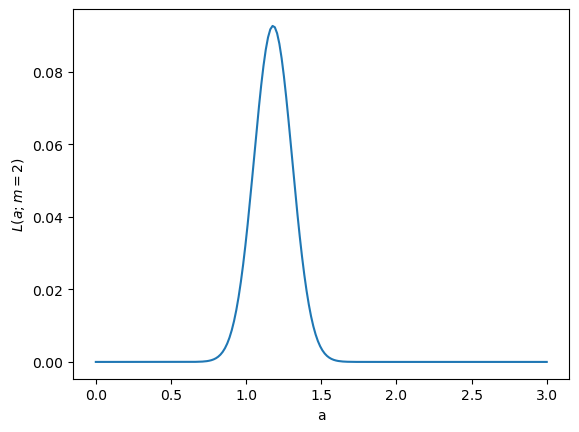

In [297]:
plt.plot(m_axis, like_vect(2, m_axis, xs, ys[0], sigma_y))
plt.xlabel("a")
plt.ylabel("$L(a; m=2)$")
#plt.yscale('log')
plt.show()

### Log-likelihood

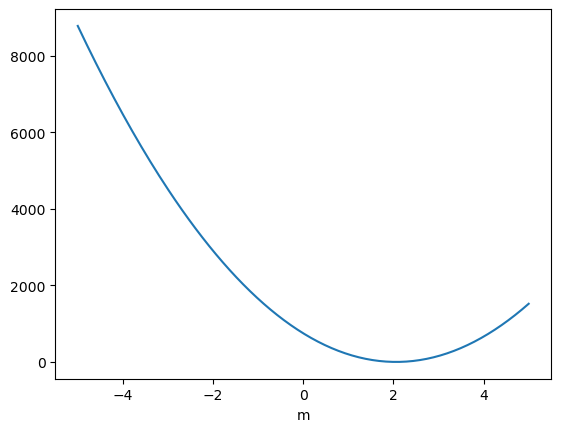

In [295]:
def logL(m, a, xs, ys, sigma_y):
    return np.sum(-stats.norm.logpdf(ys,xs*m+a,sigma_y))

logL_vect = np.vectorize(logL, excluded=[2,3])

m_axis = np.linspace(-5,5,200)
plt.plot(m_axis, logL_vect(m_axis,1,xs, ys[0], sigma_y))
plt.xlabel("m")
plt.show()

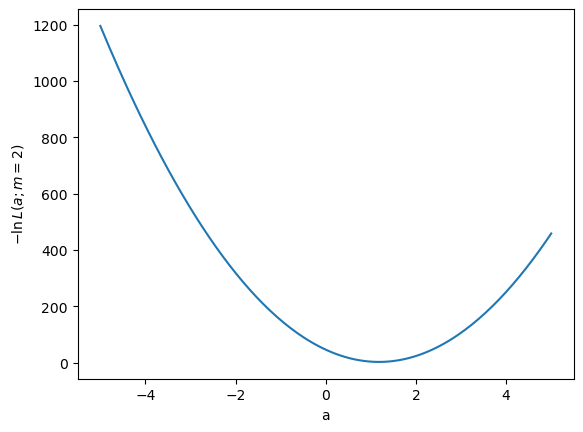

In [133]:
plt.plot(m_axis, logL_vect(2, m_axis, xs, ys[0], sigma_y))
plt.xlabel("a")
plt.ylabel("$-\ln L(a; m=2)$")
plt.savefig("loglike_a.png")
plt.show()

### Find the minimum of log-likelihood

In [298]:
res = opti.minimize( lambda p: logL(p[0], p[1],xs, ys[0], sigma_y), x0=np.zeros(2))
print(res)
print(res.x, res.hess_inv)
#print(mhat, ahat, V_am)
#print(res.hess_inv/V_am)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.3768486152842225
        x: [ 1.994e+00  1.192e+00]
      nit: 4
      jac: [ 5.662e-07  8.941e-08]
 hess_inv: [[ 9.818e-03 -1.964e-02]
            [-1.964e-02  5.527e-02]]
     nfev: 18
     njev: 6
[1.99378965 1.19164514] [[ 0.00981818 -0.01963636]
 [-0.01963636  0.05527273]]


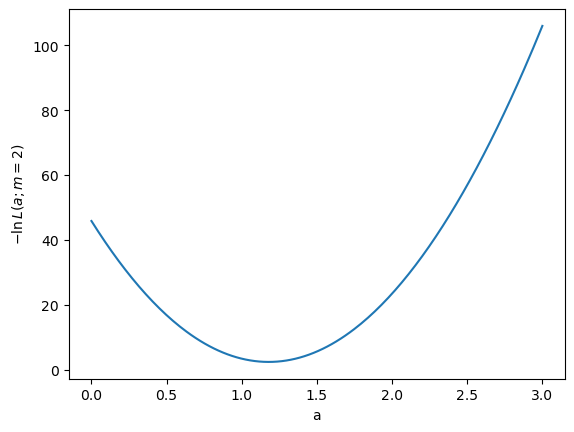

In [158]:
plt.plot(m_axis, logL_vect(2, m_axis, xs, ys[0], sigma_y))
plt.xlabel("a")
plt.ylabel("$-\ln L(a; m=2)$")
plt.savefig("loglike_a.png")
plt.show()

### ML estimator  for Poisson $\mu$ 
$$\begin{aligned}
  L(\mu) &  = & \prod_i^N  P(k_i; \mu) =  \prod_i^N   \frac{\mu^{k_i}e^{-\mu}}{k_i!}\\
  \ln L(\mu) &  = & \sum_{i=1}^N \left( \ln \mu^{k_i} + \ln e^{-\mu} - \ln k_i!\right)\\
  & = &  \sum_{i=1}^N  \left( k_i \ln \mu -\mu -  \ln k_i!\right)\\
 0  \stackrel{!}{=} \frac{d \ln L(\mu)}{d\mu} \Big|_{\hat \mu}& = &   \sum_{i=1}^N \left( \frac{k_i}{\hat \mu} - 1\right)  = \sum_{i=1}^N  \frac{k_i}{\hat\mu} - N\\
  N & = & \frac{1}{\hat\mu} \sum_{i=1}^N  k_i \rightarrow  \hat\mu =  \frac{1} {N} \sum_{i=1}^N  k_i     
\end{aligned}$$

### Variance  of the  ML estimator

Cramér–Rao bound: estimator $\hat a$ with bias $b$

$$V(\hat a) \geq \frac{\left(1+ \frac{\partial b}{\partial a} \right)^2}{E\left[-\frac{\partial^2 \ln L}{\partial a^2}\right]}$$

Fisher information:
$$I(\hat a) = E\left [-\frac{\partial^2 \ln L}{\partial a^2}\right]$$

ML estimator for Poisson $V(\hat \mu)$ 
$$\begin{aligned}
V(\hat \mu) & \geq &\frac{\left(1+ \frac{\partial b}{\partial \mu} \right)^2}{E\left[-\frac{\partial^2 \ln L}{\mu^2}\right]} \\
               & = & \frac{1}{E\left[-\frac{\partial(\sum_{i=1}^N  \frac{k_i}{\mu} - N)}{\partial \mu}\right]} \\
               & = & \frac{1}{E\left[-\sum_{i=1}^N  \frac{-k_i}{\hat \mu^2}\right]} =  \frac{1}{E\left[\sum_{i=1}^N  \frac{k_i}{\hat \mu^2}\right]} \\
               & = & \frac{1}{\frac{1}{\hat \mu^2}E\left[\sum_{i=1}^N  k_i \right]} =   \frac{1}{\frac{1}{\hat \mu^2}E\left[N \hat \mu \right]}\\
               & = & \frac{\hat \mu}{N}
\end{aligned}$$

### Variance for multiple parameters $\vec \theta$

For efficient and unbiased estimator:
$$\left(V^{-1}\right)_{ij} = E\left[ -\frac{\partial^2 \ln L(\theta)}{\partial \theta_i \partial \theta_j}\right]$$

Approximation for large samples:
$$\left(\hat V^{-1}\right)_{ij} = -\frac{\partial^2 \ln L(\theta)}{\partial \theta_i \partial \theta_j}\Big|_{\theta=\hat \theta}$$

Graphical:
$$\ln L(\theta) \approx \ln L(\hat \theta) + \frac{\partial \ln L}{\partial \theta}\Big|_{\hat \theta}(\theta - \hat \theta) + \frac{1}{2} \frac{\partial^2 \ln L}{\partial \theta^2}(\theta - \hat \theta)^2$$
$$\ln L(\hat \theta + \sigma_\theta)  \approx \ln L(\hat \theta) + \frac{1}{2} \frac{\partial^2 \ln L}{\partial \theta^2}(\sigma_\theta)^2  = \ln L(\hat \theta) - \frac{1}{2}$$

### Relation between ML and $\chi^2$

Likelihood ratio:
$$\lambda = -2 \ln \frac{L(\hat \theta)}{L(\hat \theta^\prime_\text{saturiert})}$$

For Gaussian distribution: 
$$\begin{aligned}
\lambda &=& -2 \ln \frac{L(\hat \theta)}{L(\hat \theta^\prime_\text{saturiert})} = -2 \ln \frac{\prod_i G(x_i; \hat \mu, \sigma_i)}{\prod_i G(x_i; x_i, \sigma_i)}\\
& = & -2 \ln \frac{\frac{1}{\sqrt{2\pi}\sigma_i}exp\left(\frac{(x_i-\hat \mu)^2}{2\sigma_i^2}\right)}{\frac{1}{\sqrt{2\pi}\sigma_i}exp\left(\frac{(x_i-x_i)^2}{2\sigma_i^2}\right)} = -2\ln exp\left(\frac{(x_i-\hat \mu)^2}{2\sigma_i^2}\right) \\
& = & -2 \frac{(x_i-\hat \mu)^2}{2\sigma_i^2} = \chi^2 \text{; hence   } \ln L(\theta) = - \chi^2(\theta) / 2 
\end{aligned}$$

### Goodness of fit for ML

Needs likelihood ratio: 
$$\lambda = -2 \ln \frac{L(\hat \theta)}{L(\hat \theta^\prime_\text{saturiert})}$$

In [301]:
def logLratio(m, a, xs, ys, sigma_y):
    return 2*(np.sum(-stats.norm.logpdf(ys,xs*m+a,sigma_y)) - np.sum(-stats.norm.logpdf(ys,ys,sigma_y)))

print(logL(2, 1,xs, ys[0], sigma_y), logLratio(2, 1,xs, ys[0], sigma_y))

3.3826065384545885 6.712257050298824


In [302]:
def fitML(ys):
    res = opti.minimize( lambda p: logLratio(p[0], p[1],xs, ys, sigma_y), x0=np.zeros(2))
    #print(res)
    return res.x, res.hess_inv, res.fun

fitML(ys[0])

(array([1.99378965, 1.19164514]),
 array([[ 0.00490909, -0.00981818],
        [-0.00981818,  0.02763636]]),
 np.float64(4.700741203958106))

### Log-likelihood ratio

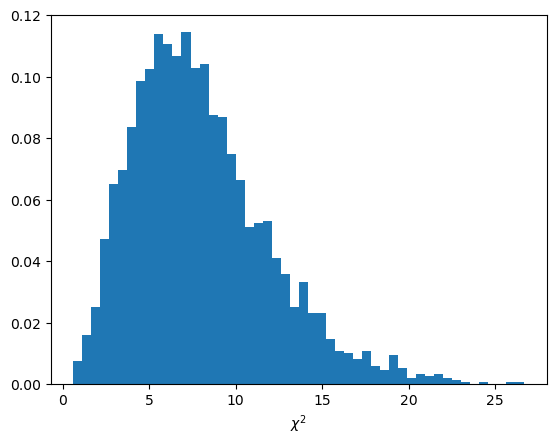

7.987704040424137


In [198]:
p = np.zeros((len(ys),2))
llr = np.zeros(3000)
for i,y in enumerate(ys[0:3000]):
    p[i],V,llr_min = fitML(y)
    llr[i] = llr_min

llr_axis = np.linspace(0,30,100)    
plt.hist(llr,bins=50, density=True)
# draw Chi2 distribution
plt.xlabel("$\chi^2$")
plt.show()
print(np.mean(llr))

### Compute p-value for goodness of fit

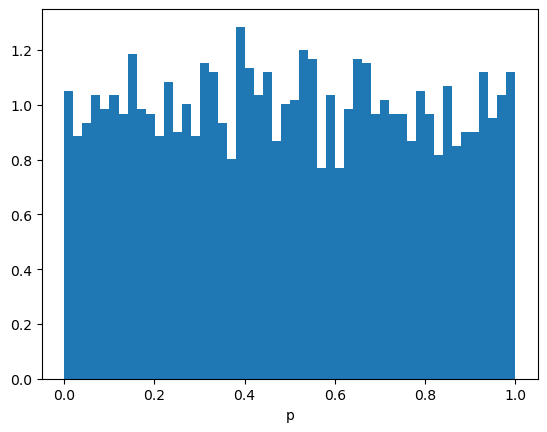

In [201]:
plt.hist(stats.chi2.sf(llr,8), bins=50, density=True)
plt.xlabel("p")
plt.show()

### Thanks a lot